Customer segmentation or customer bucketing is the practice of dividing a company’s customers into groups (a.k.a. buckets) that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Bucketing customers enables you to cater to each customer group in a way that can maximise your sales. For marketers, segmenting your target customers allows you to shape your communications in a way that causes maximum impact.

In this project, we will use cluster analysis to segment customers into clusters based on their annual income. For this, we will use Kmeans, which is one of the finest clustering algorithms out there. K-means clustering is an unsupervised learning algorithm which finds groups in data. The number of groups is represented by the letter K.

**Mall_Customers dataset is available in Kaggle**

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
scty=pd.read_csv("Mall_Customers.csv")

In [29]:
scty.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###### For clustering we should be using all the features,
###### but for visulization purposes, we are using Income and Score only

In [30]:
scty.columns=['CustomerID', 'Genre', 'Age', 'Annual_Income_in_dollars_thousand',
       'SpendingScore_out_of_100']

In [31]:
scty=scty[['Annual_Income_in_dollars_thousand','SpendingScore_out_of_100']]

In [32]:
scty.head()

,Annual_Income_in_dollars_thousand,SpendingScore_out_of_100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Using the elbow method to find the optimal number of clusters

In [33]:
from sklearn.cluster import KMeans

In [34]:
SSE=[]
K=np.arange(1,11)

In [35]:
for each in K:
    madari=KMeans(n_clusters=each)
    madari.fit(scty[['Annual_Income_in_dollars_thousand','SpendingScore_out_of_100']])
    SSE.append(madari.inertia_)

Text(0, 0.5, 'SSE')

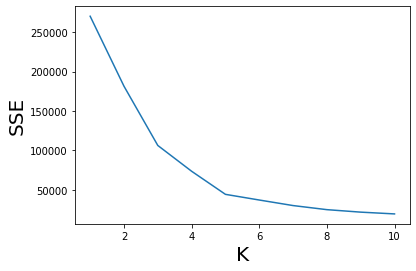

In [36]:
plt.plot(K,SSE)
plt.xlabel("K",fontsize=20)
plt.ylabel("SSE",fontsize=20)

#### selecting K=5

In [37]:
kf=KMeans(n_clusters=5)
kf.fit(scty[['Annual_Income_in_dollars_thousand','SpendingScore_out_of_100']])
kf.predict(scty[['Annual_Income_in_dollars_thousand','SpendingScore_out_of_100']])

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [38]:
Y=kf.predict(scty[['Annual_Income_in_dollars_thousand','SpendingScore_out_of_100']])

In [39]:
scty['Cluster']=Y

In [40]:
scty

,Annual_Income_in_dollars_thousand,SpendingScore_out_of_100,Cluster
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
5,17,76,3
6,18,6,1
7,18,94,3
8,19,3,1
9,19,72,3


In [41]:
m0=scty[scty.Cluster==0]
m1=scty[scty.Cluster==1]
m2=scty[scty.Cluster==2]
m3=scty[scty.Cluster==3]
m4=scty[scty.Cluster==4]

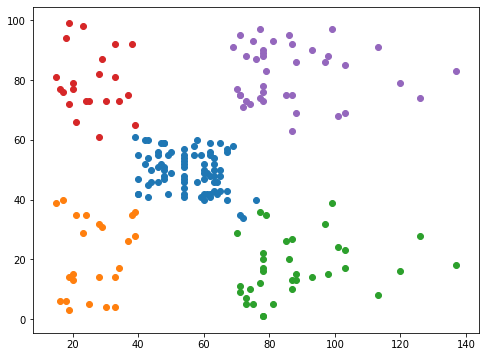

In [43]:
plt.scatter(m0.Annual_Income_in_dollars_thousand,m0.SpendingScore_out_of_100)
plt.scatter(m1.Annual_Income_in_dollars_thousand,m1.SpendingScore_out_of_100)
plt.scatter(m2.Annual_Income_in_dollars_thousand,m2.SpendingScore_out_of_100)
plt.scatter(m3.Annual_Income_in_dollars_thousand,m3.SpendingScore_out_of_100)
plt.scatter(m4.Annual_Income_in_dollars_thousand,m4.SpendingScore_out_of_100)
plt.rcParams['figure.figsize']=10,8

In [44]:
kf.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

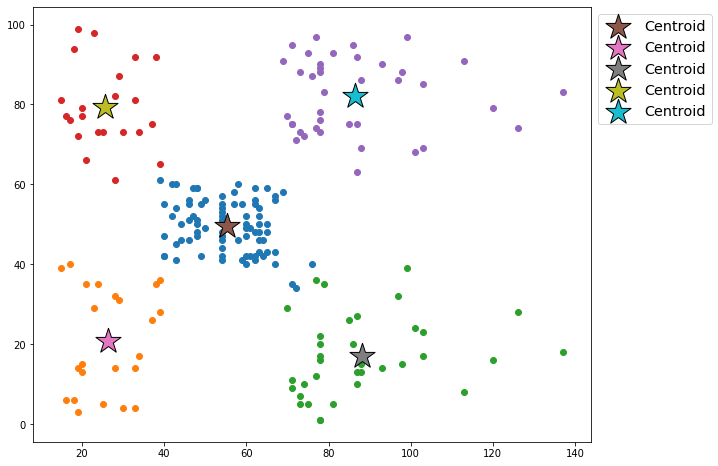

In [45]:
plt.scatter(m0.Annual_Income_in_dollars_thousand,m0.SpendingScore_out_of_100)
plt.scatter(m1.Annual_Income_in_dollars_thousand,m1.SpendingScore_out_of_100)
plt.scatter(m2.Annual_Income_in_dollars_thousand,m2.SpendingScore_out_of_100)
plt.scatter(m3.Annual_Income_in_dollars_thousand,m3.SpendingScore_out_of_100)
plt.scatter(m4.Annual_Income_in_dollars_thousand,m4.SpendingScore_out_of_100)
for i,j in kf.cluster_centers_:
    plt.scatter(i,j,marker='*',s=700,edgecolors='black',label='Centroid')
plt.legend(loc='upper left', bbox_to_anchor=(1,1),fontsize='x-large')
plt.rcParams['figure.figsize']=8,6


# Insights

Just looking at the graph tells us about the five different types of customers that frequent the mall.
Members of each of these groups would have more features common with each other, and therefore we have a homogeneous group. People of each of these clusters may have similar needs and desires. By keeping that in mind all marketing /sales activities can accommodate these needs and desires to attract more such customers. For example, a weekly discount sale that caters to the low-income group or reward points for purchases which will cater to the high spenders, turning them into regular customers. The possibilities are limitless and are only bounded by our imagination.